# MCM Problem C 2026: Exploratory Data Analysis
## Dancing with the Stars (DWTS) Competition Data

**Objective:** Comprehensive EDA to understand data structure, quality, and patterns before modeling.

---

## 1. Setup & Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries loaded successfully.")

Libraries loaded successfully.


## 2. Load Data

In [32]:
# Load the DWTS dataset
DATA_PATH = Path('../data/2026_MCM_Problem_C_Data.csv')
df = pd.read_csv(DATA_PATH, na_values=['N/A', 'n/a', ''])

print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded: 421 rows × 53 columns


## 3. Initial Inspection

In [33]:
# First 10 rows
df.head(10)

,celebrity_name,ballroom_partner,celebrity_industry,celebrity_homestate,celebrity_homecountry/region,celebrity_age_during_season,season,results,placement,week1_judge1_score,week1_judge2_score,week1_judge3_score,week1_judge4_score,week2_judge1_score,week2_judge2_score,week2_judge3_score,week2_judge4_score,week3_judge1_score,week3_judge2_score,week3_judge3_score,week3_judge4_score,week4_judge1_score,week4_judge2_score,week4_judge3_score,week4_judge4_score,week5_judge1_score,week5_judge2_score,week5_judge3_score,week5_judge4_score,week6_judge1_score,week6_judge2_score,week6_judge3_score,week6_judge4_score,week7_judge1_score,week7_judge2_score,week7_judge3_score,week7_judge4_score,week8_judge1_score,week8_judge2_score,week8_judge3_score,week8_judge4_score,week9_judge1_score,week9_judge2_score,week9_judge3_score,week9_judge4_score,week10_judge1_score,week10_judge2_score,week10_judge3_score,week10_judge4_score,week11_judge1_score,week11_judge2_score,week11_judge3_score,week11_judge4_score
0,John O'Hurley,Charlotte Jorgensen,Actor/Actress,Maine,United States,50,1,2nd Place,2,7.0,7.0,6.0,NaN,8.0,9.0,9.0,NaN,9.0,8.0,7.0,NaN,7.0,8.0,6.0,NaN,9.0,9.0,9.0,NaN,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kelly Monaco,Alec Mazo,Actor/Actress,Pennsylvania,United States,29,1,1st Place,1,5.0,4.0,4.0,NaN,5.0,6.0,6.0,NaN,6.0,7.0,8.0,NaN,9.0,9.0,8.0,NaN,8.5,7.5,7.5,NaN,8.5,9.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Evander Holyfield,Edyta Sliwinska,Athlete,Alabama,United States,42,1,Eliminated Week 3,5,5.0,7.0,6.0,NaN,5.0,4.0,5.0,NaN,5.0,4.0,4.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rachel Hunter,Jonathan Roberts,Model,NaN,New Zealand,35,1,Eliminated Week 4,4,7.0,6.0,7.0,NaN,8.0,8.0,8.0,NaN,8.0,9.0,9.0,NaN,7.0,9.0,9.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Joey McIntyre,Ashly DelGrosso,Singer/Rapper,Massachusetts,United States,32,1,3rd Place,3,7.0,7.0,6.0,NaN,8.0,7.0,6.0,NaN,7.0,7.0,8.0,NaN,7.0,6.0,7.0,NaN,8.5,7.0,7.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Trista Sutter,Louis van Amstel,TV Personality,Indiana,United States,32,1,Eliminated Week 2,6,6.0,6.0,6.0,NaN,6.0,7.0,6.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tatum O'Neal,Nick Kosovich,Actor/Actress,California,United States,42,2,Eliminated Week 2,9,7.0,8.0,8.0,NaN,5.0,6.0,6.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Tia Carrere,Maksim Chmerkoskiy,Actor/Actress,Hawaii,United States,39,2,Eliminated Week 5,6,6.0,7.0,7.0,NaN,7.0,8.0,7.0,NaN,9.0,8.0,9.0,NaN,9.0,8.0,8.0,NaN,7.0,7.0,8.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,George Hamilton,Edyta Sliwinska,Actor/Actress,Tennessee,United States,66,2,Eliminated Week 6,5,7.0,5.0,6.0,NaN,8.0,7.0,7.0,NaN,7.0,7.0,8.0,NaN,7.0,7.0,7.0,NaN,8.0,8.0,8.0,NaN,8.0,7.0,8.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Lisa Rinna,Louis van Amstel,Actor/Actress,California,United States,42,2,Eliminated Week 7,4,5.0,7.0,7.0,NaN,6.0,7.0,7.0,NaN,8.0,8.0,9.0,NaN,9.0,9.0,8.0,NaN,7.0,9.0,9.0,NaN,9.0,9.0,9.0,NaN,8.5,9.0,9.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Column names and data types
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   celebrity_name                421 non-null    str    
 1   ballroom_partner              421 non-null    str    
 2   celebrity_industry            421 non-null    str    
 3   celebrity_homestate           365 non-null    str    
 4   celebrity_homecountry/region  421 non-null    str    
 5   celebrity_age_during_season   421 non-null    int64  
 6   season                        421 non-null    int64  
 7   results                       421 non-null    str    
 8   placement                     421 non-null    int64  
 9   week1_judge1_score            421 non-null    float64
 10  week1_judge2_score            421 non-null    float64
 11  week1_judge3_score            407 non-null    float64
 12  week1_judge4_score            81 non-null     float64
 13  week2_judge1_sco

In [35]:
# All column names (formatted)
print("Columns:")
for i, col in enumerate(df.columns):
    print(f"  {i+1:2d}. {col}")

Columns:
   1. celebrity_name
   2. ballroom_partner
   3. celebrity_industry
   4. celebrity_homestate
   5. celebrity_homecountry/region
   6. celebrity_age_during_season
   7. season
   8. results
   9. placement
  10. week1_judge1_score
  11. week1_judge2_score
  12. week1_judge3_score
  13. week1_judge4_score
  14. week2_judge1_score
  15. week2_judge2_score
  16. week2_judge3_score
  17. week2_judge4_score
  18. week3_judge1_score
  19. week3_judge2_score
  20. week3_judge3_score
  21. week3_judge4_score
  22. week4_judge1_score
  23. week4_judge2_score
  24. week4_judge3_score
  25. week4_judge4_score
  26. week5_judge1_score
  27. week5_judge2_score
  28. week5_judge3_score
  29. week5_judge4_score
  30. week6_judge1_score
  31. week6_judge2_score
  32. week6_judge3_score
  33. week6_judge4_score
  34. week7_judge1_score
  35. week7_judge2_score
  36. week7_judge3_score
  37. week7_judge4_score
  38. week8_judge1_score
  39. week8_judge2_score
  40. week8_judge3_score
  41. wee

In [36]:
# Data types breakdown
print("Data Types Summary:")
print(df.dtypes.value_counts())

Data Types Summary:
float64    44
str         6
int64       3
Name: count, dtype: int64


## 4. Data Quality Assessment

In [37]:
# Missing values analysis
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print("Columns with missing values:")
missing_df[missing_df['Missing Count'] > 0]

Columns with missing values:


,Missing Count,Missing %
week11_judge4_score,395,93.82
week1_judge4_score,340,80.76
week2_judge4_score,330,78.38
week10_judge4_score,328,77.91
week8_judge4_score,313,74.35
week11_judge1_score,302,71.73
week11_judge2_score,302,71.73
week5_judge4_score,302,71.73
week11_judge3_score,302,71.73
week3_judge4_score,293,69.60


/var/folders/76/b119mp7x4fs63_bpw5mg9tc00000gn/T/ipykernel_59173/2838307522.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


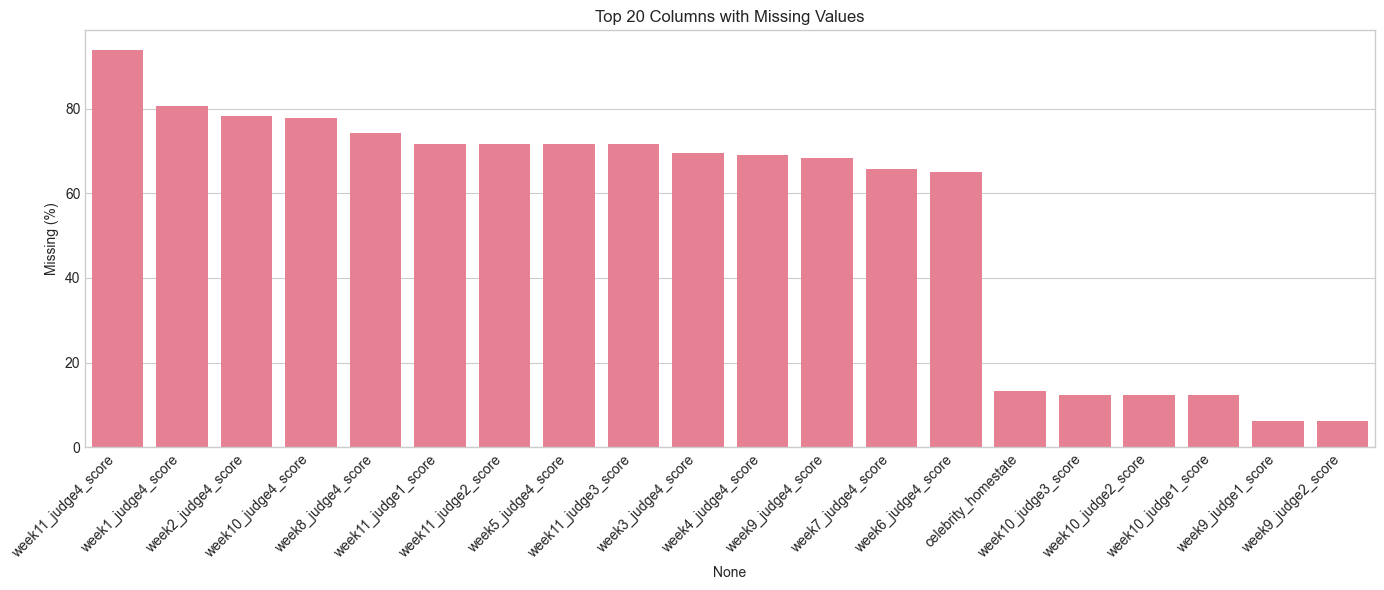

In [38]:
# Visualize missing data pattern
fig, ax = plt.subplots(figsize=(14, 6))
missing_cols = missing_df[missing_df['Missing Count'] > 0].head(20)
sns.barplot(x=missing_cols.index, y='Missing %', data=missing_cols, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top 20 Columns with Missing Values')
ax.set_ylabel('Missing (%)')
plt.tight_layout()
plt.show()

In [39]:
# Identify score columns
score_cols = [col for col in df.columns if 'judge' in col.lower() and 'score' in col.lower()]
meta_cols = [col for col in df.columns if col not in score_cols]

print(f"Score columns: {len(score_cols)}")
print(f"Metadata columns: {len(meta_cols)}")
print(f"\nMetadata columns: {meta_cols}")

Score columns: 44
Metadata columns: 9

Metadata columns: ['celebrity_name', 'ballroom_partner', 'celebrity_industry', 'celebrity_homestate', 'celebrity_homecountry/region', 'celebrity_age_during_season', 'season', 'results', 'placement']


## 5. Categorical Variables Analysis

In [40]:
# Celebrity Industry breakdown
print("Celebrity Industries:")
industry_counts = df['celebrity_industry'].value_counts()
print(industry_counts)
print(f"\nUnique industries: {df['celebrity_industry'].nunique()}")

Celebrity Industries:
celebrity_industry
Actor/Actress               128
Athlete                      95
TV Personality               67
Singer/Rapper                61
Model                        17
Comedian                     12
Social Media Personality      8
Racing Driver                 4
Radio Personality             4
Entrepreneur                  4
News Anchor                   3
Politician                    3
Sports Broadcaster            2
Beauty Pagent                 1
Magician                      1
Astronaut                     1
Fashion Designer              1
Motivational Speaker          1
Military                      1
Journalist                    1
Musician                      1
Producer                      1
Fitness Instructor            1
Con artist                    1
Conservationist               1
Social media personality      1
Name: count, dtype: int64

Unique industries: 26


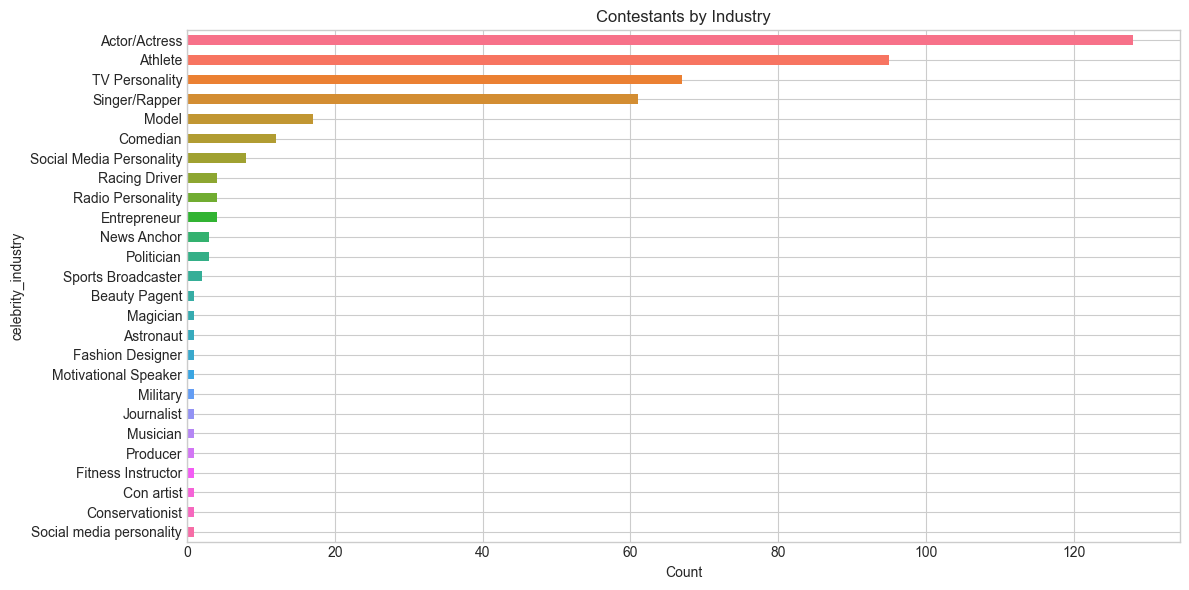

In [41]:
# Industry distribution plot
fig, ax = plt.subplots(figsize=(12, 6))
industry_counts.plot(kind='barh', ax=ax, color=sns.color_palette('husl', len(industry_counts)))
ax.set_xlabel('Count')
ax.set_title('Contestants by Industry')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [42]:
# Home country/region breakdown
print("Home Country/Region:")
country_counts = df['celebrity_homecountry/region'].value_counts()
print(country_counts)

Home Country/Region:
celebrity_homecountry/region
United States     365
England            11
Canada              9
Australia           4
Mexico              3
Czechoslovakia      3
Italy               3
Brazil              2
Chile               2
France              2
Russia              2
New Zealand         1
Yugoslavia          1
Poland              1
South Korea         1
Cuba                1
Wales               1
Germany             1
Croatia             1
Spain               1
South Africa        1
Philippines         1
Argentina           1
Ireland             1
Taiwan China        1
Venezuela           1
Name: count, dtype: int64


In [43]:
# Results breakdown
print("Competition Results:")
results_counts = df['results'].value_counts()
print(results_counts)

Competition Results:
results
Eliminated Week 2     40
Eliminated Week 7     36
Eliminated Week 8     36
Eliminated Week 4     35
2nd Place             34
1st Place             34
3rd Place             34
Eliminated Week 3     33
Eliminated Week 9     32
Eliminated Week 6     31
Eliminated Week 5     24
Eliminated Week 1     16
Eliminated Week 10    11
Withdrew              10
4th Place              8
Eliminated Week 11     4
5th Place              3
Name: count, dtype: int64


In [44]:
# Placement distribution
print("Placement Distribution:")
print(df['placement'].value_counts().sort_index())

Placement Distribution:
placement
1     34
2     34
3     34
4     34
5     34
6     34
7     33
8     33
9     33
10    34
11    30
12    28
13    15
14     5
15     4
16     2
Name: count, dtype: int64


In [45]:
# Ballroom partners - who has partnered the most?
print("Top 15 Ballroom Partners (by # of celebrities):")
partner_counts = df['ballroom_partner'].value_counts()
print(partner_counts.head(15))

Top 15 Ballroom Partners (by # of celebrities):
ballroom_partner
Cheryl Burke             25
Tony Dovolani            21
Mark Ballas              21
Valentin Chmerkovskiy    19
Karina Smirnoff          18
Maksim Chmerkoskiy       17
Derek Hough              17
Emma Slater              16
Peta Murgatroyd          15
Kym Johnson              14
Sharna Burgess           14
Witney Carson            14
Gleb Savchenko           13
Sasha Farber             12
Artem Chigvintsev        12
Name: count, dtype: int64


## 6. Numerical Variables Analysis

In [46]:
# Descriptive statistics for metadata
df[['celebrity_age_during_season', 'season', 'placement']].describe()

,celebrity_age_during_season,season,placement
count,421.000000,421.000000,421.000000
mean,38.786223,18.280285,6.814727
std,13.765274,9.730038,3.758656
min,14.000000,1.000000,1.000000
25%,29.000000,10.000000,4.000000
50%,36.000000,18.000000,7.000000
75%,47.000000,27.000000,10.000000
max,82.000000,34.000000,16.000000


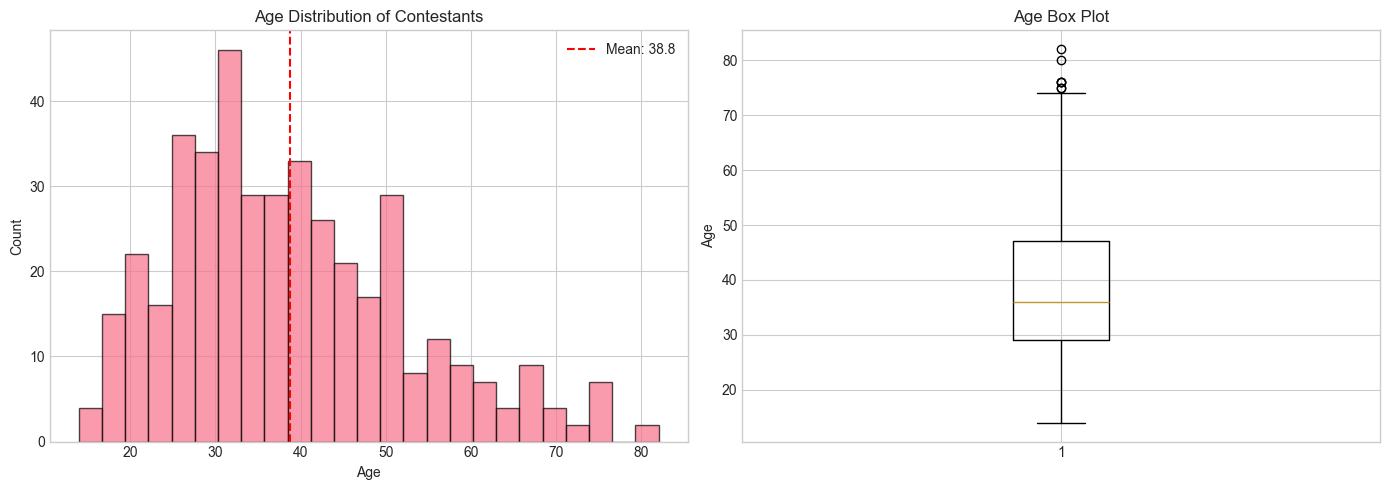

In [47]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['celebrity_age_during_season'].dropna(), bins=25, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Distribution of Contestants')
axes[0].axvline(df['celebrity_age_during_season'].mean(), color='red', linestyle='--', label=f"Mean: {df['celebrity_age_during_season'].mean():.1f}")
axes[0].legend()

# Box plot
axes[1].boxplot(df['celebrity_age_during_season'].dropna())
axes[1].set_ylabel('Age')
axes[1].set_title('Age Box Plot')

plt.tight_layout()
plt.show()

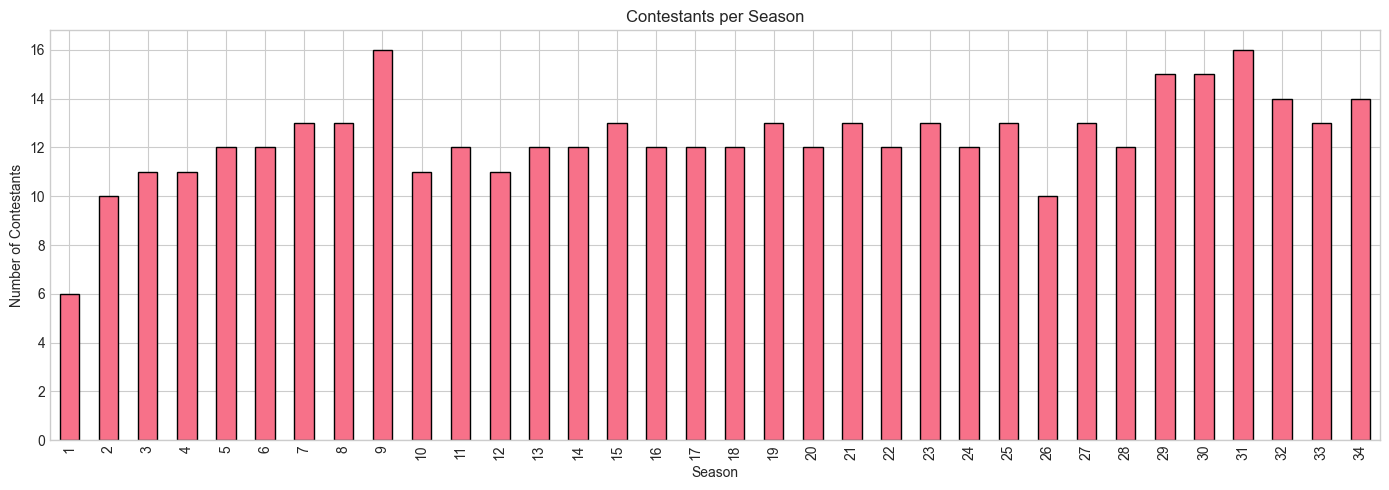

In [48]:
# Season distribution
fig, ax = plt.subplots(figsize=(14, 5))
season_counts = df['season'].value_counts().sort_index()
season_counts.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_xlabel('Season')
ax.set_ylabel('Number of Contestants')
ax.set_title('Contestants per Season')
plt.tight_layout()
plt.show()

## 7. Score Analysis

In [49]:
# Convert score columns to numeric (handling any remaining strings)
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Summary stats for Week 1 scores
week1_cols = [col for col in score_cols if 'week1' in col]
print("Week 1 Score Statistics:")
df[week1_cols].describe()

Week 1 Score Statistics:


,week1_judge1_score,week1_judge2_score,week1_judge3_score,week1_judge4_score,week10_judge1_score,week10_judge2_score,week10_judge3_score,week10_judge4_score,week11_judge1_score,week11_judge2_score,week11_judge3_score,week11_judge4_score
count,421.000000,421.000000,407.000000,81.00000,369.000000,369.000000,369.000000,93.000000,119.000000,119.000000,119.000000,26.000000
mean,6.627869,6.323831,6.520474,6.54321,2.800810,2.787258,2.820231,2.860215,3.011198,3.030808,3.030808,2.980762
std,1.221205,1.282682,1.313215,1.17313,4.341817,4.322461,4.373171,4.398224,4.507753,4.536087,4.536243,4.563205
min,4.000000,3.000000,3.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,5.000000,6.000000,6.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,6.000000,6.500000,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,7.000000,7.000000,7.00000,9.000000,9.000000,9.000000,9.000000,9.500000,9.500000,9.500000,9.375000
max,11.333300,11.333300,11.333300,9.00000,10.500000,10.500000,11.000000,10.000000,10.444400,10.444400,10.444400,10.000000


In [50]:
# Create aggregated score metrics (excluding zeros = post-elimination)
def calculate_weekly_avg(row, week_num):
    """Calculate average score for a given week, ignoring zeros and NaN."""
    week_cols = [col for col in score_cols if f'week{week_num}_' in col]
    scores = row[week_cols].replace(0, np.nan)  # Treat 0 as missing (eliminated)
    return scores.mean()

# Calculate weekly averages
for week in range(1, 12):
    df[f'week{week}_avg'] = df.apply(lambda row: calculate_weekly_avg(row, week), axis=1)

print("Created weekly average columns.")
df[[f'week{i}_avg' for i in range(1, 6)]].head(10)

Created weekly average columns.


,week1_avg,week2_avg,week3_avg,week4_avg,week5_avg
0,6.666667,8.666667,8.000000,7.000000,9.000000
1,4.333333,5.666667,7.000000,8.666667,7.833333
2,6.000000,4.666667,4.333333,NaN,NaN
3,6.666667,8.000000,8.666667,8.333333,NaN
4,6.666667,7.000000,7.333333,6.666667,7.500000
5,6.000000,6.333333,NaN,NaN,NaN
6,7.666667,5.666667,NaN,NaN,NaN
7,6.666667,7.333333,8.666667,8.333333,7.333333
8,6.000000,7.333333,7.333333,7.000000,8.000000
9,6.333333,6.666667,8.333333,8.666667,8.333333


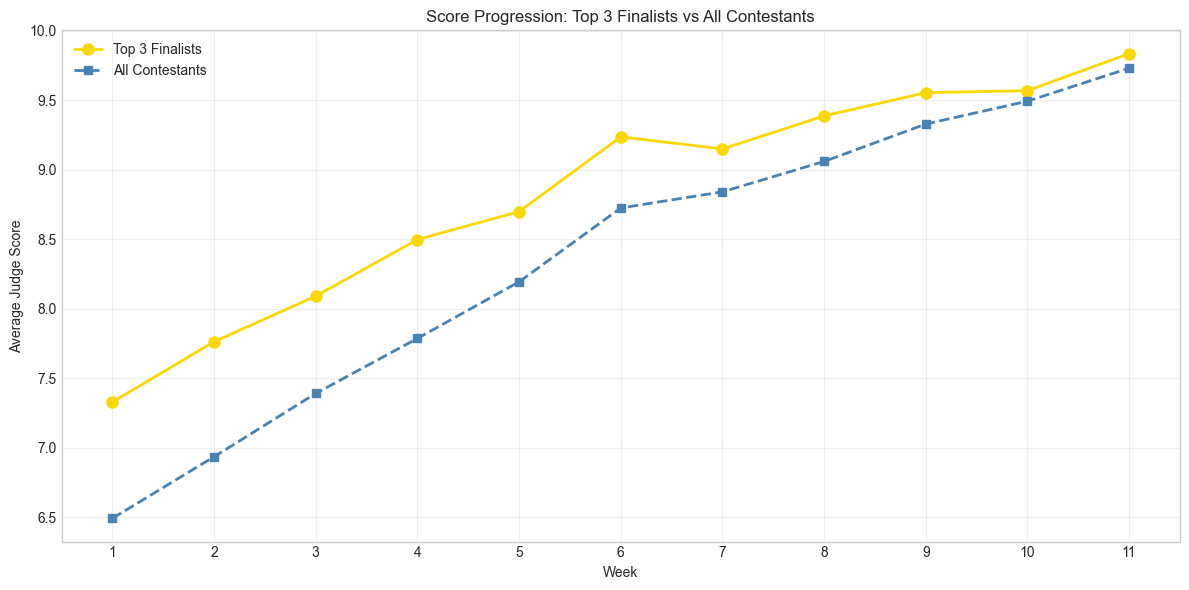

In [51]:
# Score progression over weeks (for contestants who made it to finals)
finalists = df[df['placement'] <= 3].copy()
weekly_avg_cols = [f'week{i}_avg' for i in range(1, 12)]

fig, ax = plt.subplots(figsize=(12, 6))

# Plot mean progression for top 3 vs others
top3_means = finalists[weekly_avg_cols].mean()
all_means = df[weekly_avg_cols].mean()

weeks = range(1, 12)
ax.plot(weeks, top3_means.values, 'o-', linewidth=2, markersize=8, label='Top 3 Finalists', color='gold')
ax.plot(weeks, all_means.values, 's--', linewidth=2, markersize=6, label='All Contestants', color='steelblue')

ax.set_xlabel('Week')
ax.set_ylabel('Average Judge Score')
ax.set_title('Score Progression: Top 3 Finalists vs All Contestants')
ax.legend()
ax.set_xticks(weeks)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

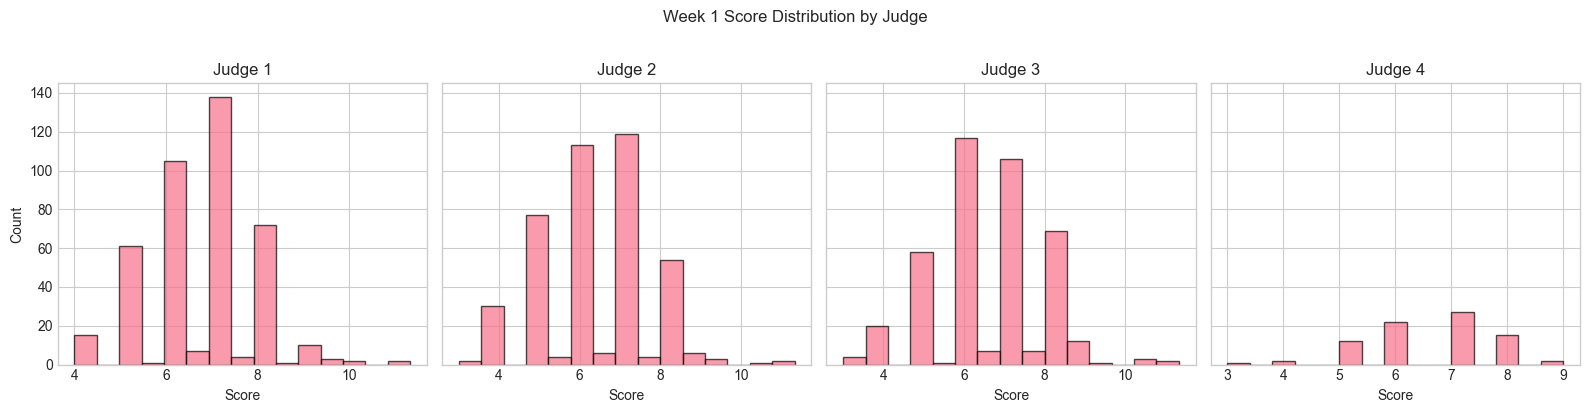

In [52]:
# Score distribution by judge (Week 1)
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for i in range(4):  # Fixed: iterate exactly 4 times
    col = week1_cols[i]
    valid_scores = df[col].dropna()
    valid_scores = valid_scores[valid_scores > 0]  # Exclude zeros
    axes[i].hist(valid_scores, bins=15, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Judge {i+1}')
    axes[i].set_xlabel('Score')
    if i == 0:
        axes[i].set_ylabel('Count')

plt.suptitle('Week 1 Score Distribution by Judge', y=1.02)
plt.tight_layout()
plt.show()

## 8. Relationship Analysis

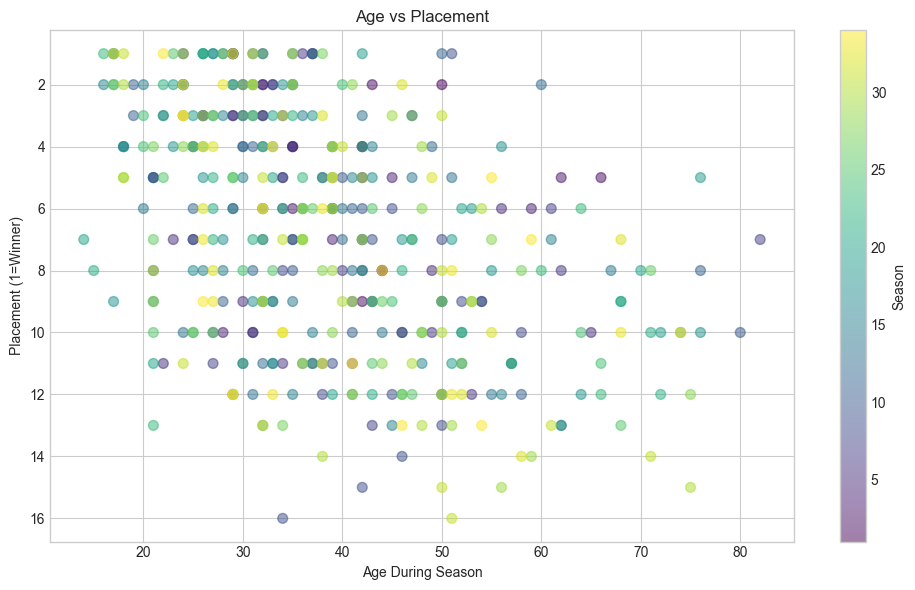

In [53]:
# Age vs Placement
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['celebrity_age_during_season'], df['placement'], 
                     alpha=0.5, c=df['season'], cmap='viridis', s=50)
ax.set_xlabel('Age During Season')
ax.set_ylabel('Placement (1=Winner)')
ax.set_title('Age vs Placement')
ax.invert_yaxis()  # Lower placement = better
plt.colorbar(scatter, label='Season')
plt.tight_layout()
plt.show()

/var/folders/76/b119mp7x4fs63_bpw5mg9tc00000gn/T/ipykernel_59173/3332684417.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


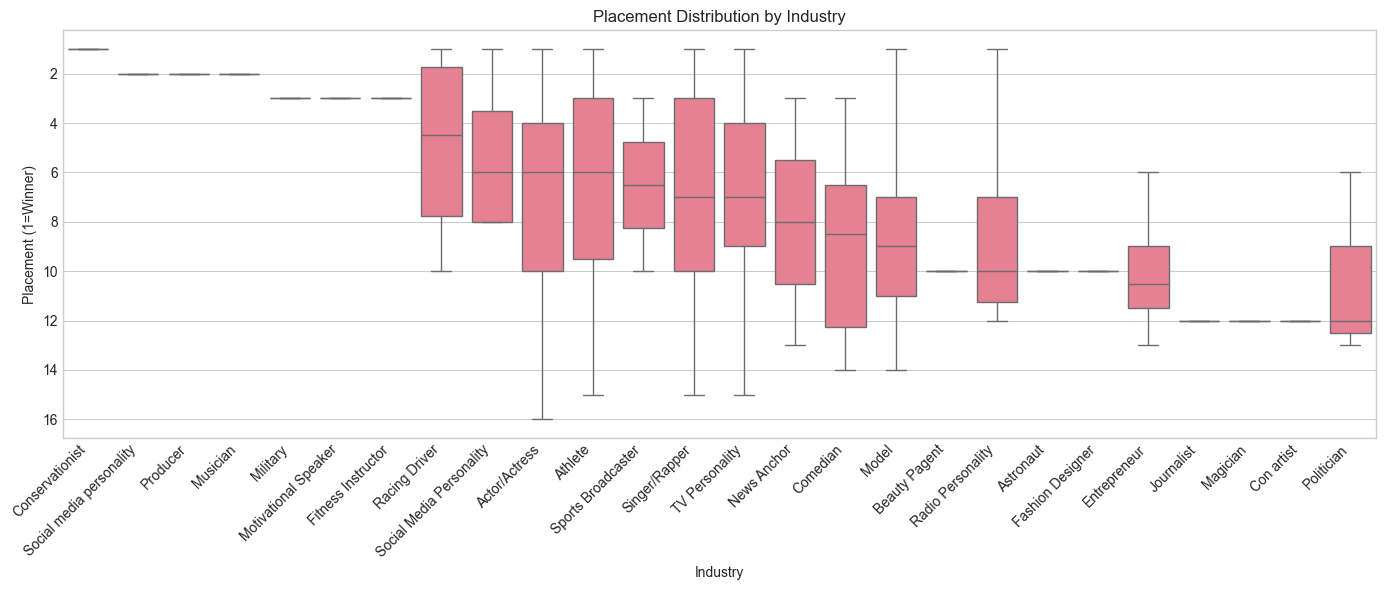

In [54]:
# Industry vs Placement (boxplot)
fig, ax = plt.subplots(figsize=(14, 6))

# Order by median placement
industry_order = df.groupby('celebrity_industry')['placement'].median().sort_values().index

sns.boxplot(data=df, x='celebrity_industry', y='placement', order=industry_order, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel('Placement (1=Winner)')
ax.set_xlabel('Industry')
ax.set_title('Placement Distribution by Industry')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

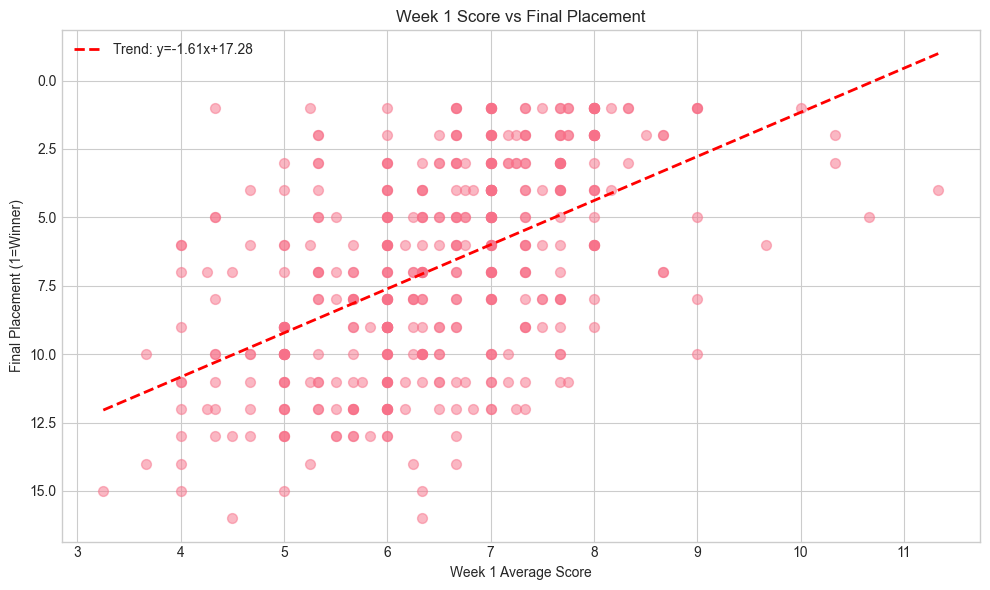

Correlation (Week 1 Avg → Placement): -0.523


In [55]:
# Week 1 average score vs final placement
fig, ax = plt.subplots(figsize=(10, 6))

valid_data = df[df['week1_avg'].notna()]
ax.scatter(valid_data['week1_avg'], valid_data['placement'], alpha=0.5, s=50)

# Add trend line
z = np.polyfit(valid_data['week1_avg'], valid_data['placement'], 1)
p = np.poly1d(z)
x_line = np.linspace(valid_data['week1_avg'].min(), valid_data['week1_avg'].max(), 100)
ax.plot(x_line, p(x_line), 'r--', linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

ax.set_xlabel('Week 1 Average Score')
ax.set_ylabel('Final Placement (1=Winner)')
ax.set_title('Week 1 Score vs Final Placement')
ax.invert_yaxis()
ax.legend()
plt.tight_layout()
plt.show()

# Correlation
corr = valid_data['week1_avg'].corr(valid_data['placement'])
print(f"Correlation (Week 1 Avg → Placement): {corr:.3f}")

In [56]:
# Partner success rate analysis
# Calculate average overall score for each contestant (across all weeks they competed)
weekly_avg_cols = [f'week{i}_avg' for i in range(1, 12)]
df['overall_avg_score'] = df[weekly_avg_cols].mean(axis=1, skipna=True)

partner_stats = df.groupby('ballroom_partner').agg({
    'placement': ['mean', 'min', 'count'],
    'week1_avg': 'mean',
    'overall_avg_score': 'mean'
}).round(2)
partner_stats.columns = ['avg_placement', 'best_placement', 'num_partners', 'avg_week1_score', 'avg_judge_points']
partner_stats = partner_stats.sort_values('avg_placement')

# Filter to partners with 3+ appearances
experienced_partners = partner_stats[partner_stats['num_partners'] >= 3]
print("Top 15 Partners by Average Placement (min 3 appearances):")
experienced_partners.head(15)

Top 15 Partners by Average Placement (min 3 appearances):


,avg_placement,best_placement,num_partners,avg_week1_score,avg_judge_points
ballroom_partner,,,,,
Derek Hough,2.94,1,17,7.77,8.88
Julianne Hough,4.20,1,5,6.77,7.85
Daniella Karagach,4.60,1,5,6.13,7.85
Mark Ballas,5.19,1,21,7.36,8.29
Valentin Chmerkovskiy,5.26,1,19,7.02,8.37
Lindsay Arnold,5.40,1,10,6.52,7.58
Witney Carson,5.50,1,14,6.66,7.90
Cheryl Burke,5.80,1,25,6.56,7.65
Maksim Chmerkoskiy,6.00,1,17,7.08,7.92


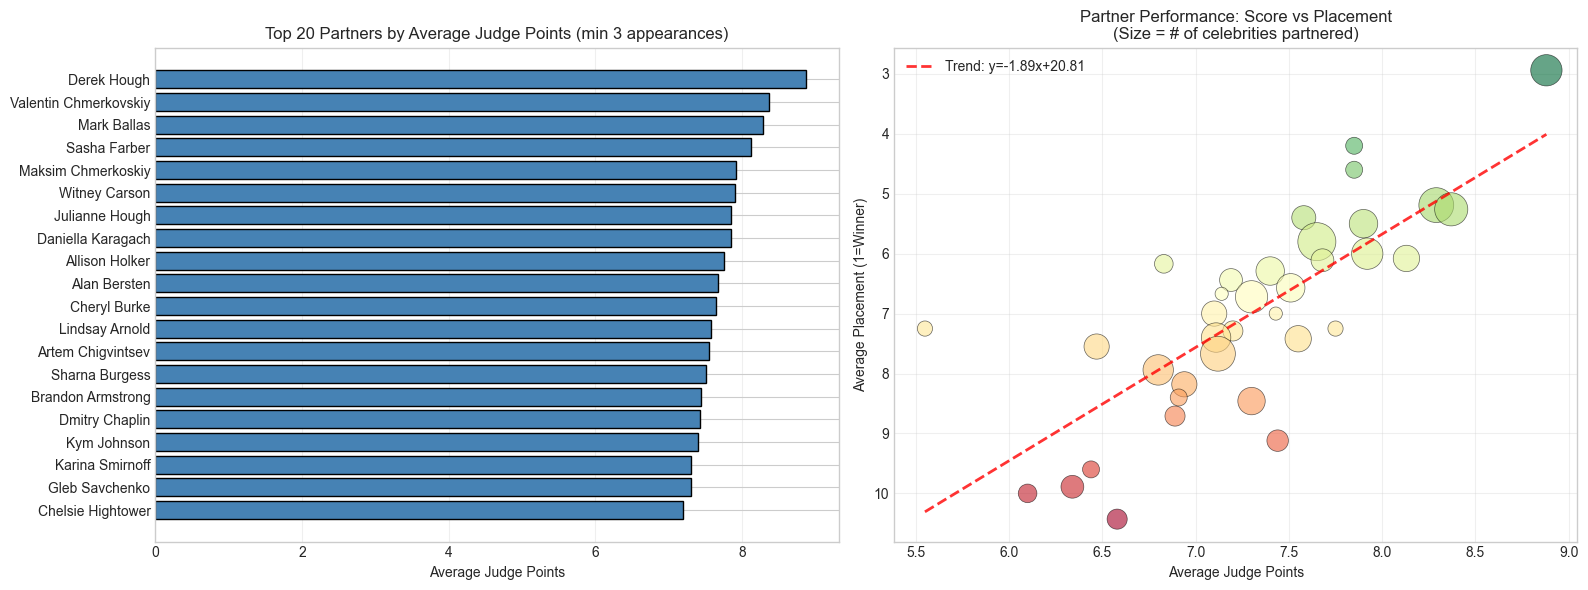


📊 Correlation (Avg Judge Points → Avg Placement): -0.759
   → Strong negative correlation
   → Higher scores strongly predict better (lower) placement


In [57]:
# Visualize correlation between ballroom partners and judge scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sort by avg_judge_points for better visualization
top_partners = experienced_partners.nlargest(20, 'avg_judge_points')

# Plot 1: Bar chart of top 20 partners by average judge points
axes[0].barh(range(len(top_partners)), top_partners['avg_judge_points'], color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_partners)))
axes[0].set_yticklabels(top_partners.index)
axes[0].set_xlabel('Average Judge Points')
axes[0].set_title('Top 20 Partners by Average Judge Points (min 3 appearances)')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Scatter plot showing relationship between avg_judge_points and avg_placement
axes[1].scatter(experienced_partners['avg_judge_points'], 
                experienced_partners['avg_placement'],
                s=experienced_partners['num_partners']*30,
                alpha=0.6,
                c=experienced_partners['avg_placement'],
                cmap='RdYlGn_r',
                edgecolors='black',
                linewidth=0.5)

# Add trend line
z = np.polyfit(experienced_partners['avg_judge_points'], experienced_partners['avg_placement'], 1)
p = np.poly1d(z)
x_line = np.linspace(experienced_partners['avg_judge_points'].min(), 
                     experienced_partners['avg_judge_points'].max(), 100)
axes[1].plot(x_line, p(x_line), 'r--', linewidth=2, alpha=0.8,
            label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

axes[1].set_xlabel('Average Judge Points')
axes[1].set_ylabel('Average Placement (1=Winner)')
axes[1].set_title('Partner Performance: Score vs Placement\n(Size = # of celebrities partnered)')
axes[1].invert_yaxis()
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display correlation
corr = experienced_partners['avg_judge_points'].corr(experienced_partners['avg_placement'])
print(f"\n📊 Correlation (Avg Judge Points → Avg Placement): {corr:.3f}")
print(f"   → {'Strong' if abs(corr) > 0.7 else 'Moderate' if abs(corr) > 0.4 else 'Weak'} {'negative' if corr < 0 else 'positive'} correlation")
print(f"   → Higher scores strongly predict better (lower) placement" if corr < -0.5 else "")

## 9. Temporal Analysis (Across Seasons)

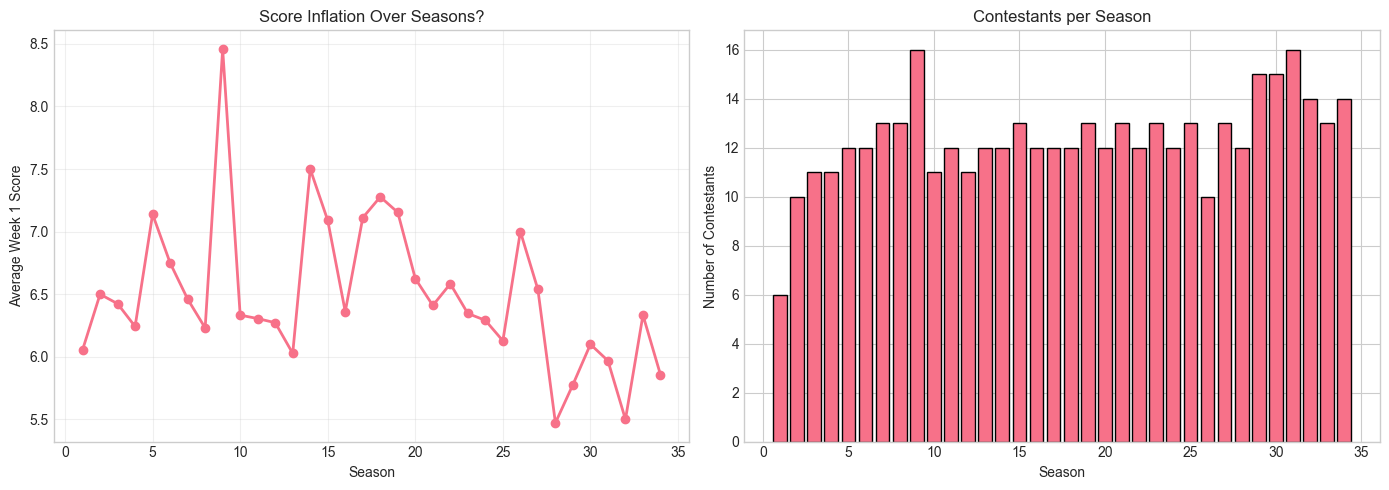

In [58]:
# Average Week 1 scores over seasons (score inflation?)
season_stats = df.groupby('season').agg({
    'week1_avg': 'mean',
    'celebrity_age_during_season': 'mean',
    'placement': 'count'
}).rename(columns={'placement': 'num_contestants'})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(season_stats.index, season_stats['week1_avg'], 'o-', linewidth=2)
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Average Week 1 Score')
axes[0].set_title('Score Inflation Over Seasons?')
axes[0].grid(True, alpha=0.3)

axes[1].bar(season_stats.index, season_stats['num_contestants'], edgecolor='black')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Contestants')
axes[1].set_title('Contestants per Season')

plt.tight_layout()
plt.show()

In [59]:
# Winners by industry over time
winners = df[df['placement'] == 1][['season', 'celebrity_name', 'celebrity_industry', 'ballroom_partner']]
print(f"Total Winners in Dataset: {len(winners)}")
print("\nWinners by Industry:")
print(winners['celebrity_industry'].value_counts())

Total Winners in Dataset: 34

Winners by Industry:
celebrity_industry
Athlete                     11
Actor/Actress                8
TV Personality               6
Singer/Rapper                4
Racing Driver                1
Model                        1
Radio Personality            1
Social Media Personality     1
Conservationist              1
Name: count, dtype: int64


## 10. Key Observations Summary

In [60]:
# Summary statistics
print("="*60)
print("KEY OBSERVATIONS")
print("="*60)
print(f"\n📊 Dataset: {df.shape[0]} contestants across {df['season'].nunique()} seasons")
print(f"\n👤 Demographics:")
print(f"   - Age range: {df['celebrity_age_during_season'].min():.0f} - {df['celebrity_age_during_season'].max():.0f} years")
print(f"   - Mean age: {df['celebrity_age_during_season'].mean():.1f} years")
print(f"   - Top industry: {df['celebrity_industry'].mode()[0]} ({(df['celebrity_industry'] == df['celebrity_industry'].mode()[0]).sum()} contestants)")

print(f"\n💃 Partners:")
print(f"   - Unique partners: {df['ballroom_partner'].nunique()}")
print(f"   - Most prolific: {df['ballroom_partner'].value_counts().idxmax()} ({df['ballroom_partner'].value_counts().max()} contestants)")

print(f"\n📈 Scoring:")
print(f"   - Week 1 avg score range: {df['week1_avg'].min():.1f} - {df['week1_avg'].max():.1f}")
print(f"   - Week 1 → Placement correlation: {df['week1_avg'].corr(df['placement']):.3f}")

print(f"\n🏆 Winners:")
winners_industry = df[df['placement']==1]['celebrity_industry'].value_counts()
print(f"   - Most winning industry: {winners_industry.idxmax()} ({winners_industry.max()} wins)")

print(f"\n⚠️ Data Quality Notes:")
print(f"   - Judge 4 scores missing in early seasons (3-judge format)")
print(f"   - Zeros in score columns = contestant eliminated")
print(f"   - {df['celebrity_homestate'].isna().sum()} contestants missing home state")

KEY OBSERVATIONS

📊 Dataset: 421 contestants across 34 seasons

👤 Demographics:
   - Age range: 14 - 82 years
   - Mean age: 38.8 years
   - Top industry: Actor/Actress (128 contestants)

💃 Partners:
   - Unique partners: 60
   - Most prolific: Cheryl Burke (25 contestants)

📈 Scoring:
   - Week 1 avg score range: 3.2 - 11.3
   - Week 1 → Placement correlation: -0.523

🏆 Winners:
   - Most winning industry: Athlete (11 wins)

⚠️ Data Quality Notes:
   - Judge 4 scores missing in early seasons (3-judge format)
   - Zeros in score columns = contestant eliminated
   - 56 contestants missing home state


---

## Next Steps

1. **Parse Problem PDF** - Extract exact questions/requirements from `2026_MCM_Problem_C.pdf`
2. **Feature Engineering** - Create survival duration, score improvement rate, partner experience metrics
3. **Modeling** - Survival analysis, classification (winner prediction), regression (score prediction)
4. **Sensitivity Analysis** - How robust are predictions to judge variability?

---

## 11. Objective 1 Prep: Fan Vote Estimation Baseline Metrics

**Goal:** Develop metrics and features to help estimate fan votes (which are unknown).

**Key Insight:** We know:
- Judge scores (exact) 
- Who was eliminated each week (result of combined judge + fan votes)
- Two combination methods: Rank-based and Percent-based

We can work **backwards** from elimination results to constrain/estimate fan votes.

### 11.1 Your Observations - Testing Partner Effect Hypothesis

In [61]:
# Test your hypothesis: Do judges favor partners while fans favor celebrities?
# Compare Derek Hough vs Sasha Farber as examples

print("="*70)
print("HYPOTHESIS TEST: Judge vs Fan Preferences")
print("="*70)

# Derek Hough example
derek = experienced_partners.loc['Derek Hough']
print(f"\n🌟 Derek Hough:")
print(f"   Avg Placement: {derek['avg_placement']:.2f} (very good)")
print(f"   Avg Judge Points: {derek['avg_judge_points']:.2f} (HIGHEST)")
print(f"   Num Partners: {derek['num_partners']:.0f}")
print(f"   → Interpretation: Consistently high judge scores + good placements")
print(f"   → Likely gets BOTH judge approval AND fan votes (or great celebrities)")

# Sasha Farber example  
sasha = experienced_partners.loc['Sasha Farber']
print(f"\n💃 Sasha Farber:")
print(f"   Avg Placement: {sasha['avg_placement']:.2f} (worse)")
print(f"   Avg Judge Points: {sasha['avg_judge_points']:.2f} (still high!)")
print(f"   Num Partners: {sasha['num_partners']:.0f}")
print(f"   → Interpretation: High judge scores but worse placement")
print(f"   → Likely partnered with less popular celebrities = lower FAN votes")

print(f"\n📊 KEY INSIGHT:")
print(f"   If Judge Score is HIGH but Placement is POOR → LOW FAN VOTES")
print(f"   This gives us a signal to estimate fan vote patterns!")
print("="*70)

HYPOTHESIS TEST: Judge vs Fan Preferences

🌟 Derek Hough:
   Avg Placement: 2.94 (very good)
   Avg Judge Points: 8.88 (HIGHEST)
   Num Partners: 17
   → Interpretation: Consistently high judge scores + good placements
   → Likely gets BOTH judge approval AND fan votes (or great celebrities)

💃 Sasha Farber:
   Avg Placement: 6.08 (worse)
   Avg Judge Points: 8.13 (still high!)
   Num Partners: 12
   → Interpretation: High judge scores but worse placement
   → Likely partnered with less popular celebrities = lower FAN votes

📊 KEY INSIGHT:
   If Judge Score is HIGH but Placement is POOR → LOW FAN VOTES
   This gives us a signal to estimate fan vote patterns!


### 11.2 Feature Engineering for Fan Vote Estimation

In [62]:
# Create comprehensive features that could predict fan voting patterns

# ============================================================================
# 1. CELEBRITY POPULARITY PROXIES
# ============================================================================

# Industry popularity (some industries have bigger fan bases)
industry_placement_avg = df.groupby('celebrity_industry')['placement'].mean().to_dict()
df['industry_avg_placement'] = df['celebrity_industry'].map(industry_placement_avg)

industry_winner_count = df[df['placement'] == 1].groupby('celebrity_industry').size().to_dict()
df['industry_winner_count'] = df['celebrity_industry'].map(industry_winner_count).fillna(0)

print("Celebrity Industry Popularity Metrics:")
print(df.groupby('celebrity_industry')[['industry_avg_placement', 'industry_winner_count']].first().sort_values('industry_avg_placement'))

# ============================================================================
# 2. PARTNER EFFECT FEATURES
# ============================================================================

# Partner historical performance (proxy for skill AND fan appeal)
partner_historical = df.groupby('ballroom_partner').agg({
    'placement': 'mean',
    'overall_avg_score': 'mean'
}).rename(columns={'placement': 'partner_avg_placement', 'overall_avg_score': 'partner_avg_score'})

df = df.merge(partner_historical, left_on='ballroom_partner', right_index=True, how='left')

print(f"\n\nPartner Effect Features Created:")
print(f"  - partner_avg_placement: Historical avg placement for this partner")
print(f"  - partner_avg_score: Historical avg judge score for this partner")

# ============================================================================
# 3. AGE DEMOGRAPHICS  
# ============================================================================

# Age groups (different demographics may appeal to different fan bases)
df['age_group'] = pd.cut(df['celebrity_age_during_season'], 
                         bins=[0, 25, 35, 45, 55, 100], 
                         labels=['<25', '25-34', '35-44', '45-54', '55+'])

age_group_stats = df.groupby('age_group')['placement'].mean()
print(f"\n\nAge Group Performance:")
print(age_group_stats)

# ============================================================================
# 4. GEOGRAPHIC/REGIONAL APPEAL
# ============================================================================

# US vs International
df['is_us_celebrity'] = df['celebrity_homecountry/region'] == 'United States'
us_vs_intl = df.groupby('is_us_celebrity')['placement'].mean()
print(f"\n\nUS vs International Celebrity Performance:")
print(us_vs_intl)

# ============================================================================
# 5. TEMPORAL FEATURES
# ============================================================================

# Early seasons vs later seasons (show popularity, voting patterns change)
df['season_era'] = pd.cut(df['season'], bins=[0, 10, 20, 30, 40], 
                          labels=['1-10', '11-20', '21-30', '31+'])

print(f"\n\nSeason Era Distribution:")
print(df['season_era'].value_counts().sort_index())

print("\n✅ Feature engineering complete!")
print(f"DataFrame now has {df.shape[1]} columns (added ~10 new features)")

Celebrity Industry Popularity Metrics:
                          industry_avg_placement  industry_winner_count
celebrity_industry                                                     
Conservationist                         1.000000                    1.0
Social media personality                2.000000                    0.0
Producer                                2.000000                    0.0
Musician                                2.000000                    0.0
Military                                3.000000                    0.0
Motivational Speaker                    3.000000                    0.0
Fitness Instructor                      3.000000                    0.0
Racing Driver                           5.000000                    1.0
Social Media Personality                5.375000                    1.0
Athlete                                 6.263158                   11.0
Sports Broadcaster                      6.500000                    0.0
TV Personality           

### 11.3 Judge-Fan Disagreement Signals (KEY METRIC!)

In [63]:
# CRITICAL INSIGHT: If someone has LOW judge scores but GOOD placement → HIGH FAN VOTES!
# This is our strongest signal for estimating fan votes

# Calculate "performance vs expectation" metric
# Expected placement based on judge scores vs actual placement

print("="*70)
print("JUDGE-FAN DISAGREEMENT ANALYSIS")
print("="*70)

# For each contestant, compare their Week 1 judge rank vs final placement
df['week1_judge_performance'] = df['week1_avg']  # Already calculated

# Create a "judge-fan gap" metric for winners and top performers
top_performers = df[df['placement'] <= 5].copy()
top_performers['week1_rank_in_season'] = top_performers.groupby('season')['week1_avg'].rank(ascending=False)

# Compare Week 1 judge rank to final placement
top_performers['judge_fan_gap'] = top_performers['week1_rank_in_season'] - top_performers['placement']

print("\nContestants with BIGGEST POSITIVE judge-fan gap (fans loved them more than judges):")
print("(Positive gap = placement better than judge ranking predicted)\n")
controversial = top_performers.nlargest(15, 'judge_fan_gap')[['celebrity_name', 'season', 'placement', 
                                                                'week1_rank_in_season', 'judge_fan_gap', 
                                                                'week1_avg', 'celebrity_industry']]
print(controversial.to_string())

print("\n" + "="*70)
print("\n💡 CONTROVERSIAL CASES FROM PROBLEM STATEMENT:")

# Check specific controversial contestants mentioned in the problem
controversial_cases = [
    ('Jerry Rice', 2),
    ('Billy Ray Cyrus', 4), 
    ('Bristol Palin', 11),
    ('Bobby Bones', 27)
]

for name, season_num in controversial_cases:
    contestant = df[(df['celebrity_name'] == name) & (df['season'] == season_num)]
    if len(contestant) > 0:
        contestant = contestant.iloc[0]
        print(f"\n{name} (Season {season_num}):")
        print(f"   Placement: {contestant['placement']}")
        print(f"   Week 1 Score: {contestant['week1_avg']:.2f}")
        print(f"   Overall Avg Score: {contestant['overall_avg_score']:.2f}")
        print(f"   Industry: {contestant['celebrity_industry']}")
        print(f"   Partner: {contestant['ballroom_partner']}")
    else:
        print(f"\n{name} (Season {season_num}): NOT FOUND in dataset")

print("\n" + "="*70)

JUDGE-FAN DISAGREEMENT ANALYSIS

Contestants with BIGGEST POSITIVE judge-fan gap (fans loved them more than judges):
(Positive gap = placement better than judge ranking predicted)

       celebrity_name  season  placement  week1_rank_in_season  judge_fan_gap  week1_avg celebrity_industry
1        Kelly Monaco       1          1                   5.0            4.0   4.333333      Actor/Actress
102      Donny Osmond       9          1                   5.0            4.0   9.999967      Singer/Rapper
174   Melissa Rycroft      15          1                   5.0            4.0   7.000000     TV Personality
355     Iman Shumpert      30          1                   5.0            4.0   5.250000            Athlete
384     Xochitl Gomez      32          1                   4.0            3.0   6.000000      Actor/Actress
401       Ilona Maher      33          2                   5.0            3.0   6.000000            Athlete
31   Apolo Anton Ohno       4          1                   3.5 

### 11.4 Weekly Elimination Constraint Analysis

In [64]:
# Analyze weekly eliminations to understand constraints on fan voting

# Parse the 'results' column to extract elimination week
def extract_elimination_week(result_str):
    """Extract week number from results string like 'Eliminated Week 3'"""
    if pd.isna(result_str):
        return None
    if 'Week' in str(result_str):
        try:
            # Extract number after 'Week'
            week_str = str(result_str).split('Week')[1].strip().split()[0]
            return int(week_str)
        except:
            return None
    return None

df['elimination_week'] = df['results'].apply(extract_elimination_week)

# For finalists (1st, 2nd, 3rd place), they weren't eliminated
df.loc[df['placement'] <= 3, 'elimination_week'] = 11  # Assume week 11 is finals

print("Elimination Week Distribution:")
print(df['elimination_week'].value_counts().sort_index())

# Calculate survival duration
df['weeks_survived'] = df['elimination_week']

print("\n\nSurvival Statistics:")
print(f"Mean weeks survived: {df['weeks_survived'].mean():.2f}")
print(f"Median weeks survived: {df['weeks_survived'].median():.2f}")

# Survival by industry
print("\n\nAverage Weeks Survived by Industry:")
survival_by_industry = df.groupby('celebrity_industry')['weeks_survived'].mean().sort_values(ascending=False)
print(survival_by_industry)

# Survival by partner
print("\n\nTop Partners by Average Weeks Survived:")
survival_by_partner = df.groupby('ballroom_partner')['weeks_survived'].mean().sort_values(ascending=False)
print(survival_by_partner.head(15))

Elimination Week Distribution:
elimination_week
1.0      16
2.0      40
3.0      33
4.0      35
5.0      24
6.0      31
7.0      36
8.0      36
9.0      32
10.0     11
11.0    106
Name: count, dtype: int64


Survival Statistics:
Mean weeks survived: 6.86
Median weeks survived: 7.00


Average Weeks Survived by Industry:
celebrity_industry
Military                    11.000000
Social media personality    11.000000
Conservationist             11.000000
Producer                    11.000000
Musician                    11.000000
Fitness Instructor          11.000000
Motivational Speaker        11.000000
Social Media Personality     9.000000
Racing Driver                8.250000
Actor/Actress                7.121951
Athlete                      7.100000
TV Personality               6.934426
Singer/Rapper                6.862069
News Anchor                  6.000000
Politician                   6.000000
Sports Broadcaster           6.000000
Comedian                     5.583333
Radio Personal

### 11.5 Score Trajectory & Momentum Features

Score Trajectory Features:

Week 1→2 Improvement Stats:
count    404.000000
mean       0.392431
std        0.951942
min       -4.666633
25%        0.000000
50%        0.333333
75%        1.000000
max        2.666667
Name: week1_to_week2_improvement, dtype: float64

Early Score Consistency (lower = more consistent):
count    404.000000
mean       0.750799
std        0.333245
min        0.000000
25%        0.515388
50%        0.714582
75%        0.917928
max        2.081653
Name: score_consistency_early, dtype: float64

Correlations with Final Placement:
  Week 1→2 Improvement: -0.036
  Early Improvement: -0.085
  Score Consistency: -0.216


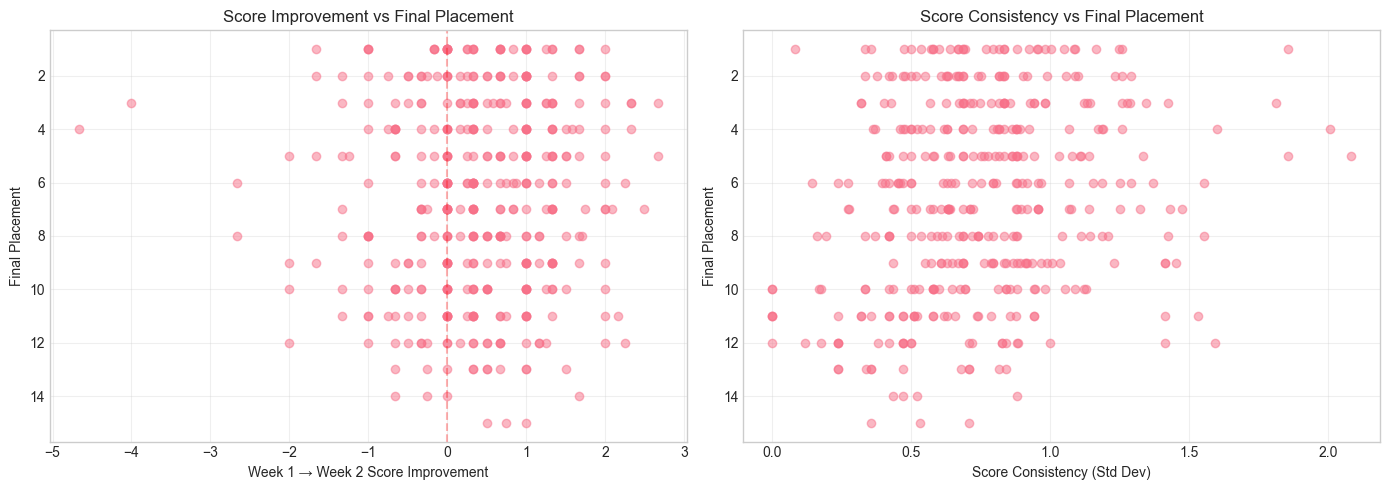

In [65]:
# Calculate score improvement/decline over time (momentum effect on fans)

# Score improvement from Week 1 to Week 2
df['week1_to_week2_improvement'] = df['week2_avg'] - df['week1_avg']

# Calculate average improvement over first 3 weeks
df['early_improvement'] = (df['week3_avg'] - df['week1_avg']) / 2  # Per-week improvement

# Score variance (consistency)
first_few_weeks = [f'week{i}_avg' for i in range(1, 5)]
df['score_consistency_early'] = df[first_few_weeks].std(axis=1)

print("Score Trajectory Features:")
print(f"\nWeek 1→2 Improvement Stats:")
print(df['week1_to_week2_improvement'].describe())

print(f"\nEarly Score Consistency (lower = more consistent):")
print(df['score_consistency_early'].describe())

# Correlation with placement
print(f"\nCorrelations with Final Placement:")
print(f"  Week 1→2 Improvement: {df['week1_to_week2_improvement'].corr(df['placement']):.3f}")
print(f"  Early Improvement: {df['early_improvement'].corr(df['placement']):.3f}")
print(f"  Score Consistency: {df['score_consistency_early'].corr(df['placement']):.3f}")

# Visualize improvement vs placement
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Week 1→2 improvement vs placement
valid_improvement = df[df['week1_to_week2_improvement'].notna() & df['placement'].notna()]
axes[0].scatter(valid_improvement['week1_to_week2_improvement'], 
                valid_improvement['placement'], alpha=0.5)
axes[0].set_xlabel('Week 1 → Week 2 Score Improvement')
axes[0].set_ylabel('Final Placement')
axes[0].set_title('Score Improvement vs Final Placement')
axes[0].invert_yaxis()
axes[0].axvline(0, color='red', linestyle='--', alpha=0.3)
axes[0].grid(True, alpha=0.3)

# Plot 2: Consistency vs placement
valid_consistency = df[df['score_consistency_early'].notna() & df['placement'].notna()]
axes[1].scatter(valid_consistency['score_consistency_early'], 
                valid_consistency['placement'], alpha=0.5)
axes[1].set_xlabel('Score Consistency (Std Dev)')
axes[1].set_ylabel('Final Placement')
axes[1].set_title('Score Consistency vs Final Placement')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 11.6 Baseline Approaches for Fan Vote Estimation - Summary

In [66]:
# SUMMARY: Proposed baseline approaches for fan vote estimation

print("="*80)
print("FAN VOTE ESTIMATION: BASELINE APPROACHES")
print("="*80)

approaches = """
📋 APPROACH 1: RESIDUAL-BASED ESTIMATION
   - Given: Judge scores (known) + Elimination results (known)
   - Method: Work backwards from elimination to infer fan votes
   - For each week, we know who was eliminated (lowest combined score)
   - Calculate minimum fan votes needed to produce observed eliminations
   - Constraint: Fan votes must be consistent with elimination order

📋 APPROACH 2: REGRESSION-BASED PREDICTION  
   - Predict fan votes using features that correlate with popularity:
     * Celebrity industry (athletes, actors have different fan bases)
     * Partner historical success (popular partners may attract fans)
     * Age demographics (different age groups appeal differently)
     * Score trajectory (momentum, underdog effect)
     * Geographic origin (US vs international)
   - Train on contestants where judge-fan gap is clear
   - Validate against known controversial cases

📋 APPROACH 3: OPTIMIZATION WITH CONSTRAINTS
   - Formulate as constrained optimization problem:
     * Minimize: Distance from "expected" fan distribution
     * Subject to: Elimination order constraints
     * Variables: Fan vote totals for each contestant each week
   - Expected fan distribution based on popularity proxies
   - Hard constraints from known eliminations

📋 APPROACH 4: JUDGE-FAN DISAGREEMENT QUANTIFICATION
   - Identify "controversial" contestants (judge-fan mismatch)
   - High judge score + poor placement → LOW fan votes
   - Low judge score + good placement → HIGH fan votes  
   - Use these extreme cases to calibrate the model
   - Key examples: Bobby Bones, Bristol Palin, Jerry Rice

📋 APPROACH 5: TEMPORAL/WITHIN-SEASON MODELING
   - For each season separately, estimate fan votes week-by-week
   - Use within-season rankings and eliminations as constraints
   - Account for "momentum" - previous week's votes affect current week
   - Consider vote conservation: total votes per week ≈ constant

📋 KEY METRICS TO TRACK:
   ✓ Judge score percentile within season
   ✓ Placement vs judge score gap
   ✓ Industry popularity score
   ✓ Partner historical win rate
   ✓ Age group appeal
   ✓ Score improvement trajectory
   ✓ Weeks survived
   ✓ Consistency (score variance)

📊 VALIDATION STRATEGY:
   1. Test on controversial cases (Bobby Bones, Bristol Palin, etc.)
   2. Check if estimated fan votes produce correct elimination order
   3. Cross-validate across different seasons/eras
   4. Compare rank-based vs percent-based combination methods
   5. Sensitivity analysis: How much can fan votes vary while still 
      producing correct eliminations?
"""

print(approaches)
print("="*80)

# Show a sample of our engineered features
print("\n📊 Sample of Engineered Features (first 5 contestants):")
feature_cols = ['celebrity_name', 'season', 'placement', 'week1_avg', 
                'industry_avg_placement', 'partner_avg_placement',
                'age_group', 'weeks_survived', 'week1_to_week2_improvement']
print(df[feature_cols].head(10).to_string())

print("\n\n✅ Ready to implement fan vote estimation models!")
print(f"Total features available: {df.shape[1]}")
print(f"Total contestants: {df.shape[0]}")

FAN VOTE ESTIMATION: BASELINE APPROACHES

📋 APPROACH 1: RESIDUAL-BASED ESTIMATION
   - Given: Judge scores (known) + Elimination results (known)
   - Method: Work backwards from elimination to infer fan votes
   - For each week, we know who was eliminated (lowest combined score)
   - Calculate minimum fan votes needed to produce observed eliminations
   - Constraint: Fan votes must be consistent with elimination order

📋 APPROACH 2: REGRESSION-BASED PREDICTION  
   - Predict fan votes using features that correlate with popularity:
     * Celebrity industry (athletes, actors have different fan bases)
     * Partner historical success (popular partners may attract fans)
     * Age demographics (different age groups appeal differently)
     * Score trajectory (momentum, underdog effect)
     * Geographic origin (US vs international)
   - Train on contestants where judge-fan gap is clear
   - Validate against known controversial cases

📋 APPROACH 3: OPTIMIZATION WITH CONSTRAINTS
   - Formu